<!--#  **ML Campus Batch Aug 2022 - Bangalore**
<br>

### Extra Assignment 2 -->
Transformers: Explore the significance of  self attention,positional encoding along with the encoders,decoders in the  transformer architecture.
* Use huggingface BERT and XLNet transformers on Tensorflow to carry out text classification on the given dataset. Ensure proper pre-processing of data.

* Dataset : [Yelp reviews dataset](https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz)
* Reference : https://github.com/huggingface/transformers

<br>
<!--

###### submitted by: Neeraj Ganji 
###### submitted on: 25th OCT 2022

ID: 23133
-->

##### Installing the transformers library

In [1]:
!pip install transformers -q

     |████████████████████████████████| 5.3 MB 8.0 MB/s 
     |████████████████████████████████| 7.6 MB 52.8 MB/s 
     |████████████████████████████████| 163 kB 67.3 MB/s 


##### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import transformers
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import DistilBertTokenizer, RobertaTokenizer
from tensorflow.keras.optimizers import Adam, SGD

<br>
<br>
<br>
<br>
<br>
<br>

##### Importing the data

In [2]:
!wget 'https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz'

--2022-10-25 21:42:46--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.142.232
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.142.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘yelp_review_polarity_csv.tgz.1’

yelp_review_polarit 100%[===================>] 158.67M  41.8MB/s    in 4.2s    

2022-10-25 21:42:50 (37.9 MB/s) - ‘yelp_review_polarity_csv.tgz.1’ saved [166373201/166373201]



In [3]:
!tar -xvf '/content/yelp_review_polarity_csv.tgz'

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


##### Reading the dataset

In [4]:
train = pd.read_csv('/content/yelp_review_polarity_csv/train.csv',header=None)
test = pd.read_csv('/content/yelp_review_polarity_csv/test.csv',header=None)

In [5]:
train.head()

,0,1
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


##### Changing the column names

In [6]:
train.rename(columns={0: 'Class', 1: 'Text'}, inplace=True)
test.rename(columns={0: 'Class', 1: 'Text'}, inplace=True)

In [7]:
train.head()

,Class,Text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


##### Convert target values to 0 (Positive) and 1(Negative)

In [8]:
#For training dataset

for i in range(0, len(train)):
  if train['Class'][i] == 2:
    train['Class'][i] = 0

#For test dataset

for i in range(0 , len(test)):
  if test['Class'][i] == 2:
    test['Class'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
train.head(5)

,Class,Text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,0,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,0,All the food is great here. But the best thing...


<br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br>
<br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br>
<br>
<br>

### Text classification using **BERT**

##### Loading the bert tokenizer

In [18]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased' , do_lower_case = True)

###### Defining the encoding function for input data

In [16]:


def tokenize_function(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data.Text)):
        encoded = bert_tokenizer.encode_plus(
        
        data.Text[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True,
        
      )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

##### Preprocessing the input data for training the model


In [ ]:
train_input_ids,train_attention_masks = tokenize_function(train,100)
test_input_ids,test_attention_masks = tokenize_function(test,100)

dummy = train
x_train = [train_input_ids , train_attention_masks]
y_train = dummy['Class'].values

dummy2 = test
x_test = [test_input_ids , test_attention_masks]
y_test = dummy2['Class'].values

<br>
<br>
<br><br>
<br>


##### defining function for creating a bert model


In [20]:

def built_bert_model(bert_model):
    input_ids = tf.keras.Input(shape=(100,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(100,),dtype='int32')
    
    output = bert_model([input_ids,attention_masks])

    output = output[1]
    
    output = tf.keras.layers.Dense(32,activation='relu')(output)

    output = tf.keras.layers.Dropout(0.4)(output)

    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=6e-6),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

##### Loading the pretrained bert model


In [24]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


##### Creating a bert model


In [27]:
model = built_bert_model(bert_model)


##### Training the model


In [28]:
history_bert = model.fit(x_train , y_train , validation_data = (x_test , y_test) , 
                         epochs = 5 , batch_size = 128
                         )

Epoch 1/5
391/391 [==============================] - 684s 2s/step - loss: 0.3701 - accuracy: 0.8356 - val_loss: 0.2810 - val_accuracy: 0.8788
Epoch 2/5
391/391 [==============================] - 654s 2s/step - loss: 0.2591 - accuracy: 0.8934 - val_loss: 0.2569 - val_accuracy: 0.8911
Epoch 3/5
391/391 [==============================] - 653s 2s/step - loss: 0.2211 - accuracy: 0.9118 - val_loss: 0.2582 - val_accuracy: 0.8922
Epoch 4/5
391/391 [==============================] - 653s 2s/step - loss: 0.1875 - accuracy: 0.9261 - val_loss: 0.2608 - val_accuracy: 0.8991
Epoch 5/5
391/391 [==============================] - 653s 2s/step - loss: 0.1578 - accuracy: 0.9398 - val_loss: 0.2680 - val_accuracy: 0.9014


In [30]:
def get_inputs(text, tokenizer, max_len=60):
    #Gets tensors from text using the tokenizer provided
    inps = [tokenizer.encode_plus(t, max_length=max_len, pad_to_max_length=True, add_special_tokens=True) for t in text]
    inp_tok = np.array([a['input_ids'] for a in inps])
    ids = np.array([a['attention_mask'] for a in inps])
    return inp_tok, ids

##### Checking the model predictions


In [50]:
text=['this movie was worst movie of my life']
inp_tok, ids = get_inputs(text, bert_tokenizer)
preds = model.predict([inp_tok, ids], verbose=True)
print(preds)
if preds[0][0] > 0.5:
  print('Text belongs to negative class')
else:
  print('Text belongs to positive class')

1/1 [==============================] - 4s 4s/step
[[0.9992422]]
Text belongs to negative class


##### Ploting Loss and Accuracy 

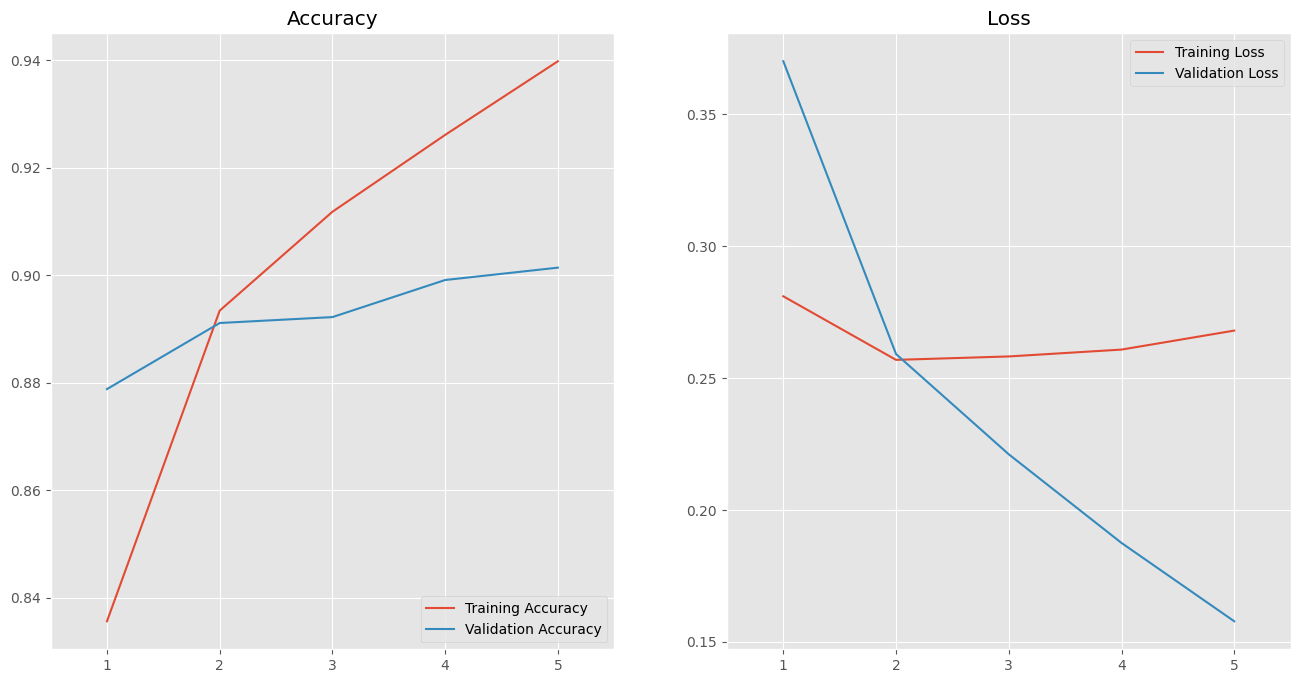

In [20]:

acc = history_bert.history['accuracy']
val_acc = history_bert.history['val_accuracy']

loss = history_bert.history['loss']
val_loss = history_bert.history['val_loss']




epochs_range = range(1,6)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ggplot')

# Graph for Training and Validation Accuracy
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlim([0.5,5.5])
plt.legend(loc='lower right')
plt.title('Accuracy')

# Graph for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlim([0.5,5.5])
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

### Text Classification with XLNET

In [55]:
! pip install Sentencepiece -q

##### Loading the pretrained XLNET model


In [10]:
from transformers import TFXLNetModel , XLNetTokenizer
xlnet_model = 'xlnet-base-cased'
xlnet_tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

##### Defining the encoding function for input data


In [21]:

def tokenize_function(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data.Text)):
        encoded = xlnet_tokenizer.encode_plus(
        
        data.Text[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        
        return_attention_mask=True,
        
      )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids), np.array(attention_masks)

##### Preprocessing the input data for training the model


In [ ]:
train_input_ids,train_attention_masks = tokenize_function(train, 100)
test_input_ids,test_attention_masks = tokenize_function(test, 100)

dummy = train
x_train = [train_input_ids , train_attention_masks]
y_train = dummy['Class'].values

dummy2 = test
x_test = [test_input_ids , test_attention_masks]
y_test = dummy2['Class'].values

##### Defining a function to create xlnet model


In [23]:

def create_model_xlnet(xlnet_model):
    
    word_inputs = tf.keras.Input(shape=(100,), name='word_inputs', dtype='int32')

    xlnet = TFXLNetModel.from_pretrained(xlnet_model)
    
    xlnet_encodings = xlnet(word_inputs)[0]

    doc_encoding = tf.squeeze(xlnet_encodings[:, -1:, :], axis=1)
    
    doc_encoding = tf.keras.layers.Dropout(0.4)(doc_encoding)
     
    outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(doc_encoding)

    model = tf.keras.Model(inputs=[word_inputs], outputs=[outputs])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

##### Creating a xlnet model


In [24]:
model_xlnet = create_model_xlnet(xlnet_model)


Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self

##### Training the model


In [25]:
history_xlnet = model_xlnet.fit(train_input_ids , y_train ,
                             validation_data = (test_input_ids, y_test),
                             epochs = 5 , batch_size = 128)

Epoch 1/5


391/391 [==============================] - 829s 2s/step - loss: 0.3390 - accuracy: 0.8613 - val_loss: 0.2407 - val_accuracy: 0.8988
Epoch 2/5
391/391 [==============================] - 809s 2s/step - loss: 0.2194 - accuracy: 0.9093 - val_loss: 0.2210 - val_accuracy: 0.9092
Epoch 3/5
391/391 [==============================] - 810s 2s/step - loss: 0.1776 - accuracy: 0.9287 - val_loss: 0.2273 - val_accuracy: 0.9124
Epoch 4/5
391/391 [==============================] - 811s 2s/step - loss: 0.1392 - accuracy: 0.9461 - val_loss: 0.2511 - val_accuracy: 0.9113
Epoch 5/5
391/391 [==============================] - 810s 2s/step - loss: 0.1090 - accuracy: 0.9585 - val_loss: 0.2451 - val_accuracy: 0.9150


##### Checking the model predictions


In [31]:
text=['this movie was worst movie of my life']
inp_tok, ids = get_inputs(text, xlnet_tokenizer)
preds = model_xlnet.predict([inp_tok], verbose=True)
print(preds)
if preds[0][0] > 0.5:
  print('Text belongs to negative class')
else:
  print('Text belongs to positive class')

1/1 [==============================] - 2s 2s/step
[[0.9889768]]
Text belongs to negative class


##### Ploting Loss and Accuracy 

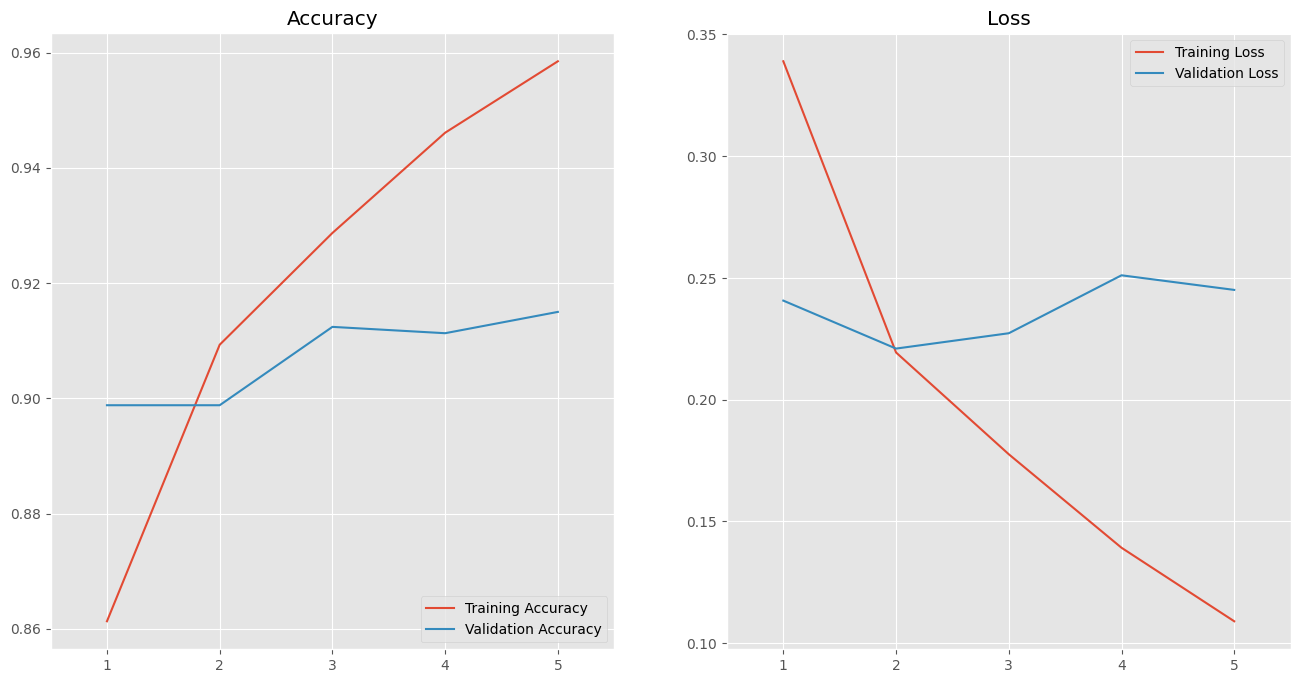

In [19]:


acc = history_xlnet.history['accuracy']
val_acc = history_xlnet.history['val_accuracy']

loss = history_xlnet.history['loss']
val_loss = history_xlnet.history['val_loss']




epochs_range = range(1,6)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ggplot')

# Graph for Training and Validation Accuracy
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlim([0.5,5.5])
plt.legend(loc='lower right')
plt.title('Accuracy')

# Graph for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlim([0.5,5.5])
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

## Thank You :D